## Digital Technologies and Data-Driven Business
# Exercises for Session 9

### Welcome to Airbnb Copenhagen

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_Bélo.svg" alt="Airbnbn Logo" style="width: 200px;"/>

Congratulations, you are only a couple of weeks into the Bachelor program in Digital Management and you already landed your dream internship as a business analyst in Airbnb’s Copenhagen office. Over the coming weeks, colleagues from other departments across the organization will provide you with datasets and ask you to generate insights based on this data. 

On your first day, your new colleague Annabelle, who works in the customer insights department, sends you a dataset. Annabelle would like to learn more about Airbnb's hosts (i.e., those users who offer accommodation on the platform) who are active in Copenhagen. Please see the text of her email below.

_Welcome to Airbnb Copenhagen. We are excited to have you on board! My name is Annabelle and I joined the customer insights department two years ago. I am really sorry to have to bug you on your first day, but everybody else in business analytics is booked at the moment. I thus wondered whether you might be able to help me to generate a couple of insights from the enclosed dataset. This is super important for a presentation I must give early next week. Could you help me with that? Please see the list of tasks below._

_You are the best!_

_Annabelle_

## Task 1

Import the necessary modules to read in a pandas DataFrame and read the file named "airbnb_hosts_insights.csv". 

_Hint_: Have a look at the Pandas function `read_csv`.

In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv('airbnb_hosts_insights.csv')
print(df.head(10)) 

   Unnamed: 0                                      listing_url  \
0           0            https://www.airbnb.com/rooms/50129088   
1           1  https://www.airbnb.com/rooms/585288456970651497   
2           3            https://www.airbnb.com/rooms/38610056   
3           4            https://www.airbnb.com/rooms/32483807   
4           6             https://www.airbnb.com/rooms/2344575   
5           8             https://www.airbnb.com/rooms/3295113   
6           9             https://www.airbnb.com/rooms/1161709   
7          10             https://www.airbnb.com/rooms/9243550   
8          12            https://www.airbnb.com/rooms/42127078   
9          13            https://www.airbnb.com/rooms/43507898   

                                                name  \
0    Luxury apartment,  with perfect location in CPH   
1                   2 bedroom apartment on the water   
2  72m2 New apartment close to the city and water...   
3         Beautiful and modern one-bedroom apartm

## Task 2
__Annabelle__: _Marc sent me this dataset. He told me it has 5,000 rows. Is that correct?_ Are there any missing values or duplicates?

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8272 entries, 0 to 8271
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8272 non-null   int64  
 1   listing_url                  8272 non-null   object 
 2   name                         8272 non-null   object 
 3   description                  8029 non-null   object 
 4   host_url                     8272 non-null   object 
 5   host_name                    8272 non-null   object 
 6   host_since                   8272 non-null   object 
 7   host_location                8265 non-null   object 
 8   host_about                   4840 non-null   object 
 9   host_response_time           6134 non-null   object 
 10  host_response_rate           6134 non-null   object 
 11  host_acceptance_rate         7163 non-null   object 
 12  host_is_superhost            8272 non-null   object 
 13  host_total_listing

In [20]:
# Code here
print(df.isnull().values.any()) 
print(df.isna().sum())

True
Unnamed: 0                        0
listing_url                       0
name                              0
description                     243
host_url                          0
host_name                         0
host_since                        0
host_location                     7
host_about                     3432
host_response_time             2138
host_response_rate             2138
host_acceptance_rate           1109
host_is_superhost                 0
host_total_listings_count         0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                    9
bedrooms                        170
beds                             85
amenities                         0
price                  

In [5]:

df.drop_duplicates(inplace = True)
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8267    False
8268    False
8269    False
8270    False
8271    False
Length: 8272, dtype: bool


Answer here

The data set has 8,272 rows it has missing values and no duplicates

## Task 3
__Annabelle__: _Could you please tell me the name of the host at index 0?_

In [6]:
# Code here
print(df.host_name[0])


Tina


Answer here

## Task 4

__Annabelle__: _And now the name of the host offering the last listing in the dataset? I just want to make sure the dataset is complete._

In [7]:
# Code here
print(df.host_name[8271]) 

Anja


Answer here

## Task 5

__Annabelle__: _Could you get me a list of all the columns contained in the dataset?_

In [8]:
# Code here
print(list(df))

['Unnamed: 0', 'listing_url', 'name', 'description', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'reviews_per_month']


## Task 6

__Annabelle__:  _I want to get a better overview of the data we're dealing with and a summary of some of the columns. What is most common accommodation type? What is the highest, lowest and average price? What is the distribution of Neighbourhoods?_

_Hint_: Use Python's description statistics functions from the Pandas package and look at the list of columns. 

In [15]:
# Code here
Propdf=(df.groupby(['property_type'])['property_type'].count())
print(df['property_type'].value_counts().nlargest(1))
print(df.describe())


property_type
Entire rental unit    4569
Name: count, dtype: int64
         Unnamed: 0  host_total_listings_count     latitude    longitude  \
count   8272.000000                8272.000000  8272.000000  8272.000000   
mean    4693.385276                  11.513177    55.679635    12.559275   
std     2953.059146                  52.555171     0.019851     0.032292   
min        0.000000                   1.000000    55.615190    12.447650   
25%     2220.500000                   1.000000    55.666128    12.542417   
50%     4390.500000                   1.000000    55.680195    12.557349   
75%     6954.750000                   2.000000    55.694083    12.581495   
max    10951.000000                 346.000000    55.735740    12.639720   

       accommodates     bedrooms         beds         price  minimum_nights  \
count   8272.000000  8102.000000  8187.000000   8272.000000     8272.000000   
mean       3.520551     1.733769     2.166606   1221.758825        4.796180   
std        

## Task 7

__Annabelle__: _While you are at it, could you do me a favor? Three of my friends are coming over from Paris this weekend. Could you get me a list of accommodations that are large enough for my three friends and that have two bathrooms? Please get me the top 5 listings by `review_scores_rating`._

_Hint_: Select the proper columns in you DataFrame for this filtering step. Name this dataframe 'trip_df' and run the function `sort_values` on this new DataFrame.

In [ ]:
# Code here


# Filter the DataFrame for listings in Paris, that accommodate 3 people and have 2 bathrooms


filtered_df = df[(df['host_location'] == ('Paris','paris')) | (df['accommodates'] == 3) | (df['bathrooms_text'] == 2)]

# Create a new DataFrame with the filtered results
trip_df = filtered_df.copy()

trip_df = trip_df.sort_values('review_scores_rating')

print(trip_df.nlargest(5, 'review_scores_rating'))

      Unnamed: 0                                      listing_url  \
6267        7069            https://www.airbnb.com/rooms/43534031   
6220        6985            https://www.airbnb.com/rooms/42782826   
8119       10561  https://www.airbnb.com/rooms/617085803631804022   
8007       10312  https://www.airbnb.com/rooms/601207731403466540   
7938       10183  https://www.airbnb.com/rooms/594581234205365141   

                                                   name  \
6267                            Sommerferie i København   
6220  Homey flat with a small south-west-facing terrace   
8119    Dejlig lejlighed tæt på centrum af København :)   
8007             Charming Spacious Central 3r Apartment   
7938  Beautiful waterfront apartment with two balconys.   

                                            description  \
6267  Kan I ikke komme på ferie til udlandet i år?<b...   
6220  Cozy apartment 55m2 with a small south-west-fa...   
8119  Nyd det simple liv i denne fredelige og centra.

## Task 8

__Annabelle__: _Thank you for the list. I'll send that to my friends. Back to the original dataset. Sorry, that I got a little bit sidetracked._

_We have this column called `host_response_time`. Unfortunately, the datatype is a string. Please add a new column to our original DataFrame. Name this column `stars_number`. If the host response time is within an hour, assign 5 stars to that column, if it is within a few hours, 4 stars, if it is within a day, 3 stars, if if is within a few days or more, 2 stars and if there is no information, 1 star._

In [17]:
# Code here
def response_time_to_stars(response_time):
    if response_time == 'within an hour':
        return 5
    elif response_time == 'within a few hours':
        return 4
    elif response_time == 'within a day':
        return 3
    elif response_time == 'within a few days' or response_time == 'a week or more':
        return 2
    else:
        return 1

# Apply the function to create the 'stars_number' column
df['stars_number'] = df['host_response_time'].apply(response_time_to_stars)

# Display the updated DataFrame with the new 'stars_number' column (optional)
print(df[['host_response_time', 'stars_number']].head())

  host_response_time  stars_number
0     within an hour             5
1     within an hour             5
2     within an hour             5
3                NaN             1
4                NaN             1


## Task 9 

__Annabelle__: _Could you please get me a new list of accommodations where the host has a value of at least 3 for the column `stars_number`_

In [ ]:
# Code here

filtered_df = df[(df['host_location'] == ('Paris','paris')) | (df['accommodates'] == 3) | (df['bathrooms_text'] == 2)]

# Create a new DataFrame with the filtered results
trip_df = filtered_df.copy()


rslt_df = trip_df[trip_df['stars_number'] >= 3 ] 

print(rslt_df)

      Unnamed: 0                                      listing_url  \
1              1  https://www.airbnb.com/rooms/585288456970651497   
2              3            https://www.airbnb.com/rooms/38610056   
7             10             https://www.airbnb.com/rooms/9243550   
13            18            https://www.airbnb.com/rooms/50779968   
14            20            https://www.airbnb.com/rooms/23440791   
...          ...                                              ...   
8208       10795  https://www.airbnb.com/rooms/627912202978586441   
8209       10798  https://www.airbnb.com/rooms/628059727822518967   
8220       10831  https://www.airbnb.com/rooms/630001057079325814   
8256       10931            https://www.airbnb.com/rooms/17615655   
8269       10949            https://www.airbnb.com/rooms/40124846   

                                                   name  \
1                      2 bedroom apartment on the water   
2     72m2 New apartment close to the city and water.

## Task 10

__Annabelle__: _In this new list, how many accommodations do the hosts have listed on Airbnb on average?_

In [ ]:
# Code here



df2 = rslt_df['host_total_listings_count'].mean()

print(df2)

11.211851851851852


Answer here

## Task 11

__Annabelle__: _Could you please plot a histogram of the column `price` for the list containing only the accommodations with a `stars_number >= 3`?_

[[<Axes: title={'center': 'Unnamed: 0'}>
  <Axes: title={'center': 'host_total_listings_count'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'accommodates'}>]
 [<Axes: title={'center': 'bedrooms'}> <Axes: title={'center': 'beds'}>
  <Axes: title={'center': 'price'}>
  <Axes: title={'center': 'minimum_nights'}>
  <Axes: title={'center': 'maximum_nights'}>]
 [<Axes: title={'center': 'number_of_reviews'}>
  <Axes: title={'center': 'number_of_reviews_ltm'}>
  <Axes: title={'center': 'number_of_reviews_l30d'}>
  <Axes: title={'center': 'review_scores_rating'}>
  <Axes: title={'center': 'review_scores_accuracy'}>]
 [<Axes: title={'center': 'review_scores_cleanliness'}>
  <Axes: title={'center': 'review_scores_checkin'}>
  <Axes: title={'center': 'review_scores_communication'}>
  <Axes: title={'center': 'review_scores_location'}>
  <Axes: title={'center': 'review_scores_value'}>]
 [<Axes: title={'center': 'license'}>
  <Axes: title=

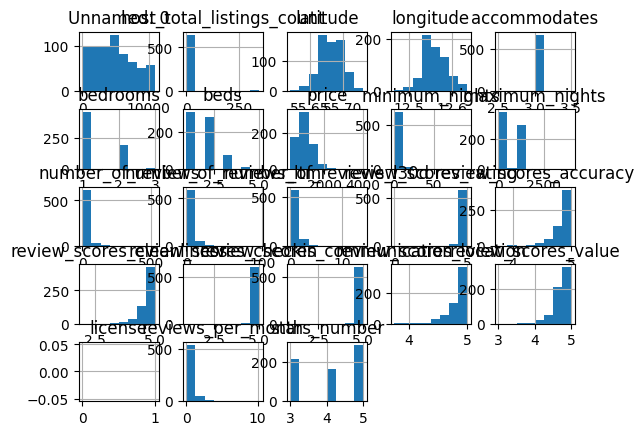

In [ ]:
# Code here
#[rslt_df['price'] & rslt_df['stars_number'] >= 3 ].hist()
hists=rslt_df.hist(bins=8)

print(hists)

[[<Axes: title={'center': 'price'}>]]


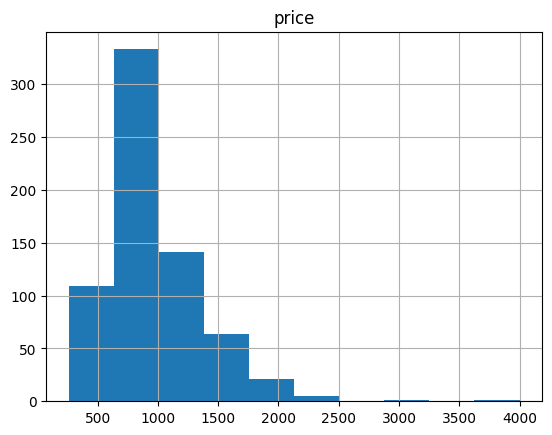

In [ ]:
#[rslt_df['price'] & rslt_df['stars_number'] >= 3 ].hist()
hists=rslt_df.hist(column='price')

print(hists)

## Task 12

__Annabelle__: _Um, that doesn't really tell us much, does it? How can we improve that?_

<Axes: xlabel='price', ylabel='Count'>

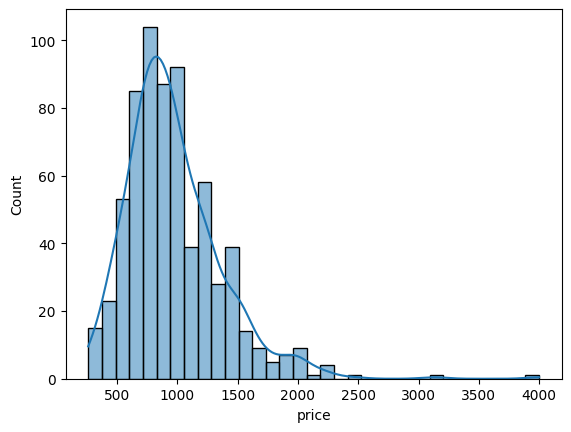

In [ ]:
# Code here
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=rslt_df, x='price', kde=True)

